# Task 1

In [38]:
import pandas as pd
import matplotlib.pyplot  as plt

titanic = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv",sep=',')
titanic.head(10)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [39]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [40]:
# Charts to plot:
# 1. Create a pie chart presenting the male/female proportion
# 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

mf = titanic.groupby('sex').count()
mf


,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
sex,,,,,,,,,,,,,
female,466,466,466,388,466,466,466,466,141,464,319,8,288
male,843,843,843,658,843,843,843,842,154,843,167,113,457


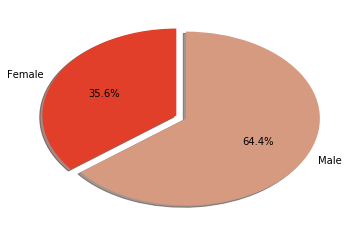

In [47]:
# 1. Create a pie chart presenting the male/female proportion

plt.pie(
      mf['name'], #Using name because name column has non null values and hence shows the total count for each gender.
    labels=['Female','Male'],
     shadow=True,
    colors=["#E13F29", "#D69A80"],
    explode=(0.08,0),
    startangle=90,
    autopct='%1.1f%%',
    )
plt.show()


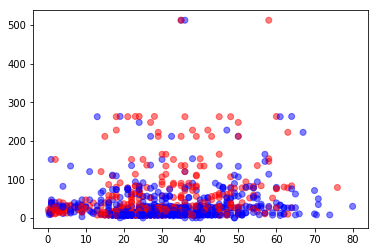

In [51]:
# 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

plt.scatter(titanic['age'], titanic['fare'], alpha=0.5, c=titanic['sex'].map({'male' : 'blue', 'female' : 'red'}))
plt.show()

# Task 2

In [185]:
import numpy as np

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})

df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [186]:
#1. Some values in the the FlightNumber column are missing. These numbers are meant to
# increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing
# numbers and make the column an integer column (instead of a float column).

df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int) # interpolate for equal distribution with an interval of 10
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


In [187]:
#2.The From_To column would be better as two separate columns! Split each string on the
# underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the
# correct column names to this temporary DataFrame.

"""df = df.join(df.From_To.str.split('_', expand=True))
df.rename(columns={0:'From',1:'To'},inplace=True)
df"""

temp = df.From_To.str.split('_', expand=True)
temp.columns = ['From', 'To']
temp

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [188]:
# 3 .Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame.
# Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become
# "London".)

temp['From'] = temp['From'].str.capitalize()
temp['To'] = temp['To'].str.capitalize()
temp

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


In [189]:
#4. Delete the From_To column from df and attach the temporary DataFrame from the previous
# questions.

df.drop('From_To',axis=1,inplace=True)
df = df.join(temp)
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


In [192]:
#5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We
# would like each first value in its own column, each second value in its own column, and so on. If
# there isn't an Nth value, the value should be NaN.

delays = df['RecentDelays'].apply(pd.Series)
delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]
df = df.drop('RecentDelays', axis=1).join(delays)
df

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045,KLM(!),London,Paris,23.0,47.0,NaN
1,10055,<Air France> (12),Madrid,Milan,NaN,NaN,NaN
2,10065,(British Airways. ),London,Stockholm,24.0,43.0,87.0
3,10075,12. Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,"""Swiss Air""",Brussels,London,67.0,32.0,NaN
